# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [2]:
# Loading data into dataframe.
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.sample(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
601,6,96,0,0,0,23.7,0.190,28,0
743,9,140,94,0,0,32.7,0.734,45,1
371,0,118,64,23,89,0.0,1.731,21,0
341,1,95,74,21,73,25.9,0.673,36,0
4,0,137,40,35,168,43.1,2.288,33,1
108,3,83,58,31,18,34.3,0.336,25,0
362,5,103,108,37,0,39.2,0.305,65,0
350,4,92,80,0,0,42.2,0.237,29,0
23,9,119,80,35,0,29.0,0.263,29,1


Outcome is the dependent variable, and it is categorical: 1 is Yes and 0 is No.

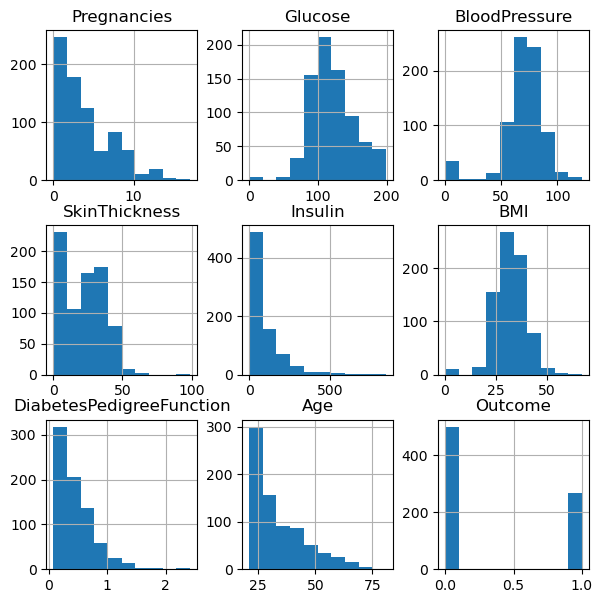

In [5]:
# Distribution of variables 
g = df.hist(figsize = (7,7))

Outcome variable looks imbalanced.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose, BloodPressure, SkinThickness, Insulin, and BMI	have min values of 0 which does not seem reasonable and so needs to be handled.
Min Pregnancies could be 0.

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

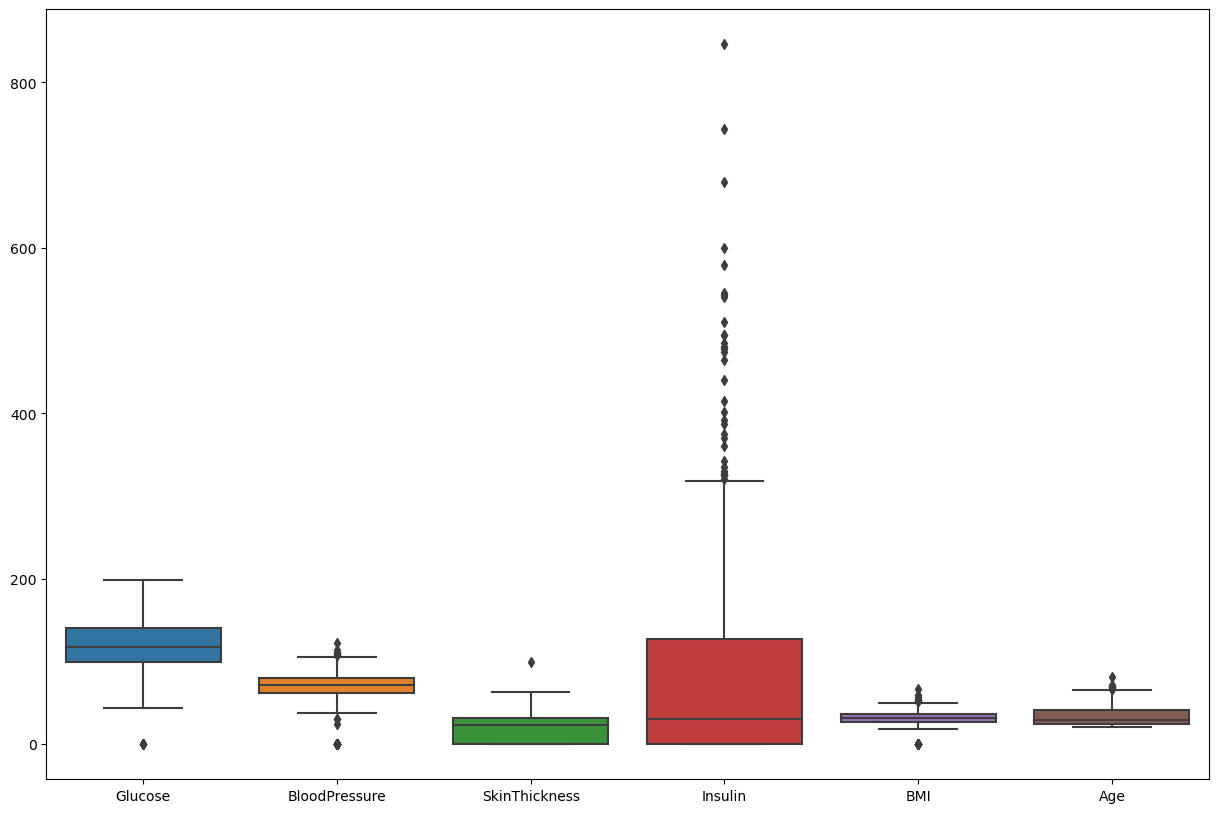

In [7]:
# To confirm presence of outliers. 
plt.figure(figsize=(15, 10))
g = sns.boxplot(data=df.drop(['Outcome', 'DiabetesPedigreeFunction', 'Pregnancies'], axis = 1))

In [8]:
# Handling missing values represented as zeros in Glucose, BloodPressure, and BMI

df = df.drop(df[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['BMI'] == 0)].index, axis=0)
df.shape

(724, 9)

In [9]:
# To reduce the effect of the outliers: Replacing zeros with median instead of mean.

SkinThickness_Median = df[df['SkinThickness']>0]['SkinThickness'].median()
Insulin_Median = df[df['Insulin']>0]['Insulin'].median()

df['SkinThickness'] = df['SkinThickness'].replace(0, SkinThickness_Median)
df['Insulin'] = df['Insulin'].replace(0, Insulin_Median)

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,29.133978,9.019267,7.000,25.000,29.000,33.0000,99.00
Insulin,724.0,142.044199,88.713438,14.000,118.250,125.500,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


In [10]:
# Average age of individuals in dataset
avg_age = df['Age'].mean()
print(f'Average age of individuals in dataset: {avg_age:.1f} \n')

#Average glucose level with diabetes
gwd = df[df['Outcome'] == 1]['Glucose'].mean()
print(f'Average glucose level with diabetes: {gwd:.0f} \n')

#Average glucose level without diabetes
gwod = df[df['Outcome'] == 0]['Glucose'].mean()
print(f'Average glucose level without diabetes: {gwod:.0f} \n')

#Average BMI level with diabetes
bwd = df[df['Outcome'] == 1]['BMI'].mean()
print(f'Average BMI with diabetes: {bwd:.1f} \n')

#Average BMI level without diabetes
bwod = df[df['Outcome'] == 0]['BMI'].mean()
print(f'Average BMI without diabetes: {bwod:.1f}')


Average age of individuals in dataset: 33.4 

Average glucose level with diabetes: 143 

Average glucose level without diabetes: 111 

Average BMI with diabetes: 35.3 

Average BMI without diabetes: 31.0


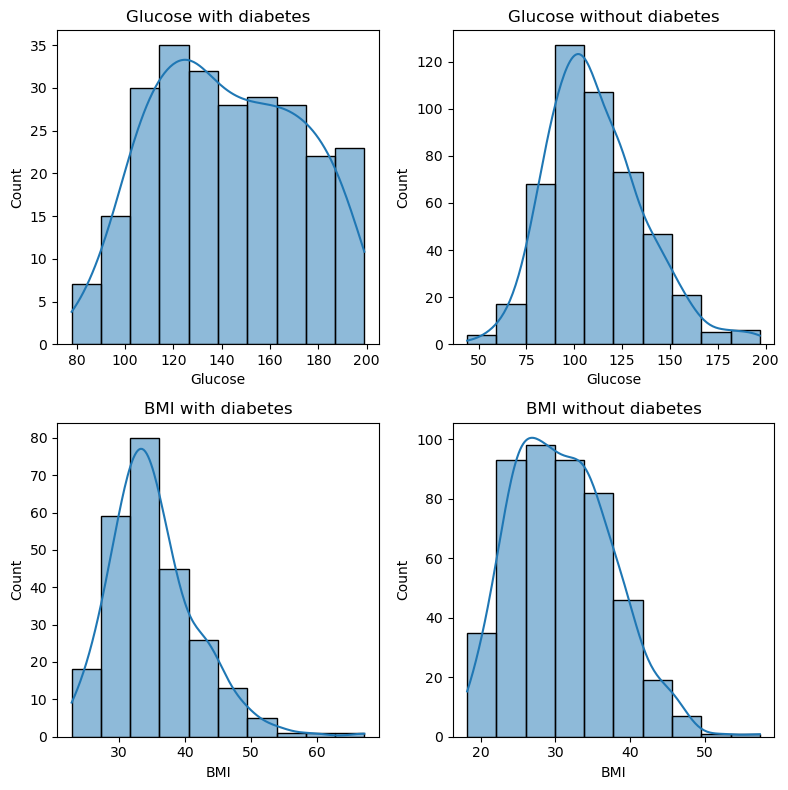

In [11]:
# Visualizing variable distributions with and without diabetes.

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.histplot(data=df[df['Outcome'] == 1], x='Glucose', bins=10, kde=True, ax=axes[0,0])
axes[0,0].set_title('Glucose with diabetes')

sns.histplot(data=df[df['Outcome'] == 0], x='Glucose', bins=10, kde=True, ax=axes[0,1])
axes[0,1].set_title('Glucose without diabetes')

sns.histplot(data=df[df['Outcome'] == 1], x='BMI', bins=10, kde=True, ax=axes[1,0])
axes[1,0].set_title('BMI with diabetes')

sns.histplot(data=df[df['Outcome'] == 0], x='BMI', bins=10, kde=True, ax=axes[1,1])
axes[1,1].set_title('BMI without diabetes')

plt.tight_layout()
plt.show()

In [12]:
# Correlation between variables.

corr_mat = df.corr()
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.078710,0.023269,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.195340,0.427117,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.191570,0.045832,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.078710,0.195340,0.191570,1.000000,0.154145,0.555098,0.106670,0.124268,0.216357
Insulin,0.023269,0.427117,0.045832,0.154145,1.000000,0.184102,0.129494,0.096894,0.211736
BMI,0.012342,0.223276,0.287403,0.555098,0.184102,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.106670,0.129494,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.124268,0.096894,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.216357,0.211736,0.299375,0.184947,0.245741,1.000000


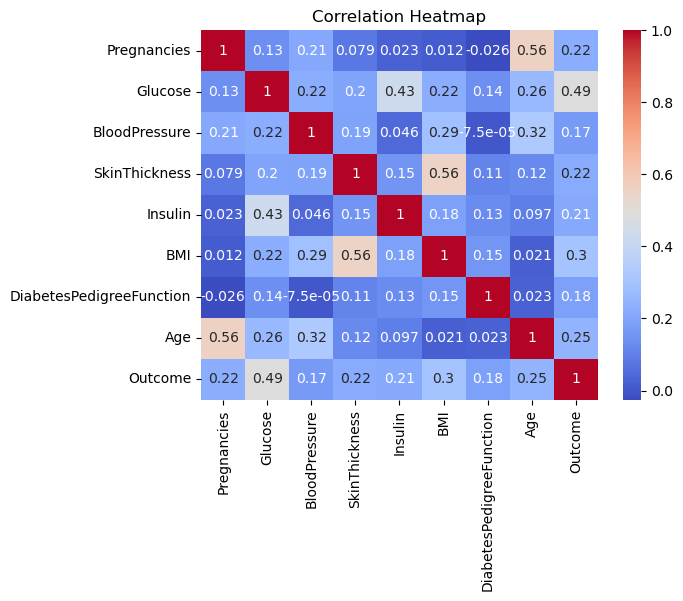

In [13]:
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df.corr()['Outcome']

Pregnancies                 0.224417
Glucose                     0.488384
BloodPressure               0.166703
SkinThickness               0.216357
Insulin                     0.211736
BMI                         0.299375
DiabetesPedigreeFunction    0.184947
Age                         0.245741
Outcome                     1.000000
Name: Outcome, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
# Feature selection.

X = df.drop(['Outcome'], axis=1) # All columns except the target outcome.
y = df['Outcome'] # Target column

In [17]:
# Splitting the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=306)

X_train.shape, X_test.shape

((579, 8), (145, 8))

In [18]:
# Scaling the data.

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
# Create a scaler object
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X_train)

In [19]:
# Feature selection for model.

X = df[['Glucose', 'BMI', 'Age']] # Based on highest correlation with Outcome.
y = df['Outcome'] # Target column.

In [20]:
# Splitting the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=306)

X_train.shape, X_test.shape

((579, 3), (145, 3))

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

Random Forest.

In [22]:
# Building the model using Random Forest.

rfc_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=306)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=306)

In [23]:
# Predicting on the training split.

y_train_pred = rfc_model.predict(X_train)

In [24]:
# Model Evaluation

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')

Accuracy: 0.8946459412780656
Precision: 0.8806818181818182
Recall: 0.7948717948717948
F1-Score: 0.8355795148247979
ROC-AUC: 0.8700921474358974


In [25]:
# Running predictions on the test split.

y_pred = rfc_model.predict(X_test)


In [26]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')

Accuracy: 0.7655172413793103
Precision: 0.6923076923076923
Recall: 0.6666666666666666
F1-Score: 0.6792452830188679
ROC-AUC: 0.7454212454212453


In [27]:
print(confusion_matrix(y_test, y_pred))

[[75 16]
 [18 36]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        91
           1       0.69      0.67      0.68        54

    accuracy                           0.77       145
   macro avg       0.75      0.75      0.75       145
weighted avg       0.76      0.77      0.76       145



Random Forest Model was tried with different depths and n values: 
Changing the depth to 7 improved the accuracy of the model.

In [29]:
#Getting feature importances for Random Forest and creating visualization.

rfc_model.feature_importances_

array([0.45302022, 0.28577917, 0.26120061])

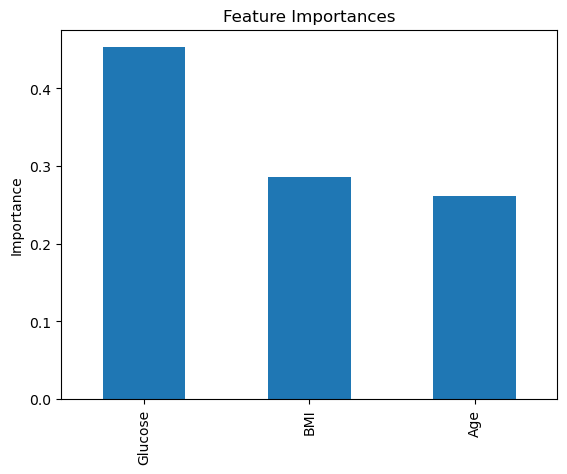

In [30]:
g = (pd.Series(rfc_model.feature_importances_, index=X.columns).plot(kind='bar'))
# plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Create and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predicting on the training split.

y_train_pred = logreg_model.predict(X_train)

In [34]:
# Model Evaluation

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')

Accuracy: 0.7823834196891192
Precision: 0.7225806451612903
Recall: 0.5743589743589743
F1-Score: 0.64
ROC-AUC: 0.7311899038461539


In [35]:
# Running predictions on the test split.

y_pred = logreg_model.predict(X_test)

In [36]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')

Accuracy: 0.7310344827586207
Precision: 0.6829268292682927
Recall: 0.5185185185185185
F1-Score: 0.5894736842105263
ROC-AUC: 0.6878306878306879


In [37]:
print(confusion_matrix(y_test, y_pred))

[[78 13]
 [26 28]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        91
           1       0.68      0.52      0.59        54

    accuracy                           0.73       145
   macro avg       0.72      0.69      0.69       145
weighted avg       0.73      0.73      0.72       145



SVM model

In [39]:
from sklearn.svm import SVC

In [40]:
# Create and fit the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [41]:
y_train_pred = svm_model.predict(X_train)

In [42]:
# Model Evaluation

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')

Accuracy: 0.7806563039723662
Precision: 0.7428571428571429
Recall: 0.5333333333333333
F1-Score: 0.6208955223880598
ROC-AUC: 0.7197916666666666


In [43]:
# Running predictions on the test split.

y_pred = svm_model.predict(X_test)

In [44]:
#Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')

Accuracy: 0.7379310344827587
Precision: 0.7352941176470589
Recall: 0.46296296296296297
F1-Score: 0.5681818181818182
ROC-AUC: 0.6820309320309321


In [45]:
print(confusion_matrix(y_test, y_pred))

[[82  9]
 [29 25]]


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        91
           1       0.74      0.46      0.57        54

    accuracy                           0.74       145
   macro avg       0.74      0.68      0.69       145
weighted avg       0.74      0.74      0.72       145



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Based on overall accuracy, the Random Forest model was overall best with an accuracy of 0.76 and this is expected with Random Forest being an ensemble technique.
However, accuracy alone should not be considered especially as the dataset is imbalanced.

- SVM was the best model based on precision. Precision focuses on the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). It indicates the model's ability to avoid false positive predictions, which is particularly important when misclassifying a positive instance as negative can have serious consequences.

- Random Forest also performed best based on Recall value. Recall (Sensitivity) measures the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives). It represents the model's ability to capture and correctly identify positive instances, which is crucial when the goal is to minimize false negatives.
This is especially important in the detection of diabetes as it can become more detrimental to an individual's health if left undetected.

- Random Forest model once again performed best based on F1-score which is a good metric to use for balanced evaluation especially in this case of imbalanced outcome data.
The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance across both classes. It is useful when there is an imbalance between the number of positive and negative instances.

- The most important features of the data set were observed to be Glucose levels, BMI, and Age with the strongest correlations to detection outcome. For future review however, the Insulin feature needs to be researched in healthcare domain as it seemed to contain a high number of outliers which may be handled differently with more domain information.